# PRÁCTICA 2 - **CLUSTERING**
-----------------------------------
- AITANA ORTIZ GUIÑO 100472097
- MARÍA PARRA MUÑOZ 100472195
-----------------------------------
REPOSITORIO GITHUB: https://github.com/aitanax/p2_aa.git

## **IMPORTS**

Realizamos todos los imports que se van a usar durante la práctica:

In [747]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import random
import time
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Tal y como se nos pidió en la práctica anterior, ponemos de semilla el NIA de uno de los miembros del grupo:

In [748]:
NIA = 100472195
# Se puede establecer de estas dos formas:
random.seed(NIA)
np.random.seed(NIA)

# **1. KMEAN PERSONALIZADO**

En este primer apartado implementamos un KMeans propio y lo comparamos con el algoritmo de k-means  de la biblioteca scikit-learn, utilizando un conjunto de datos sintéticos. 
aunque antes, un poco de contexto:
Para la comprobación de un correcto funcionamiento de nuestro modelo, utilizamos make_blobs creando así un ejemplo básico. Y para su evaluación usamos las métricas de tiempo y "silhouette score".
Además observamos que al usuario 1.0 como valor para cluster_std (estandarización alta), la precisión puede variar como consecuencia de los puntos de inicialización de los centroidos. Y es por ello que creamos el método que inicializa los centroides.

A continuación, describo detalladamente cada parte del código:

**Creación de datos de ejemplo:**
- num_samples: Número de muestras en el conjunto de datos.
- num_features: Número de características (dimensiones) de cada muestra.
- num_clusters: Número de clústeres que se desea identificar en el conjunto de datos.
- make_blobs: Esta función de scikit-learn genera un conjunto de datos distribuidos en 'blobs' o agrupaciones. Los parámetros definen la cantidad de muestras, centros (clústeres), desviación estándar de cada clúster y una semilla para la generación aleatoria, asegurando la reproducibilidad.

**Asignación de clústeres:**
- assign_clusters(data, centroids): Calcula la distancia entre cada punto del conjunto de datos y los centroides, y asigna cada punto al clúster del centroide más cercano.

**Actualización de centroides:**
- update_centroids(data, labels, k): Actualiza los centroides para que sean el promedio de todos los puntos que han sido asignados a cada clúster.

**Función k-means principal:**
- kmeans(data, k, num_iterations=10000, tolerance=1e-4): Esta función ejecuta el algoritmo k-means personalizado, iterando hasta que los centroides no cambian significativamente (menos que tolerance) o se alcanza el número máximo de iteraciones:
- Inicializa los centroides.
- Itera asignando clústeres y actualizando centroides.
- Comprueba la convergencia en cada iteración.

**Comparación de rendimiento y calidad del clúster:**
El código mide el tiempo de ejecución y calcula el puntaje de silueta para ambos métodos, k-means personalizado y scikit-learn. El puntaje de silueta mide qué tan bien se agrupan los puntos dentro de los clústeres y qué tan separados están los clústeres entre sí.

**Visualización:**
Utiliza matplotlib para visualizar los resultados de ambos métodos, mostrando los puntos de datos, los centroides y diferenciando los clústeres por color.

Comparación entre k-means personalizado y scikit-learn:
Tiempo de ejecución (personalizado): 0.001999378204345703 segundos
Silhouette score (personalizado): 0.62958576039765
Tiempo de ejecución (scikit-learn): 0.005616903305053711 segundos
Silhouette score (scikit-learn): 0.62958576039765


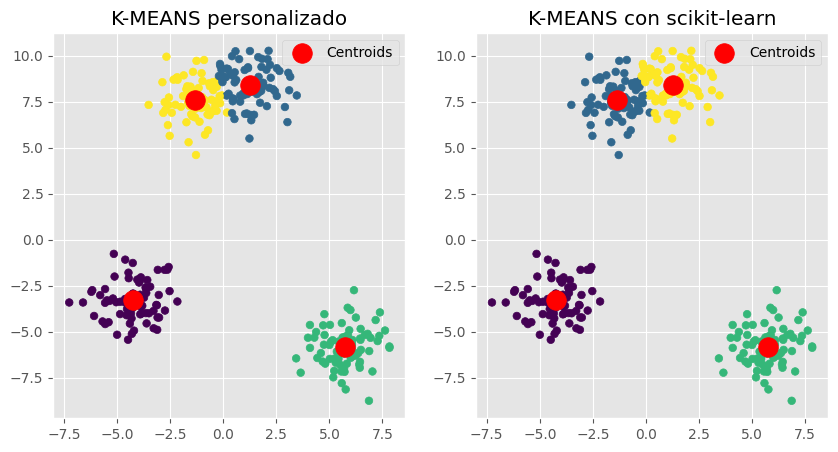

In [749]:
# Mismo datos que los del tutorial:
num_samples = 300
num_features = 2
num_clusters = 4

data, _ = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=1.0, random_state=100472195)

def initialize_centroids(data, k):
    # Escoger el centroide inicial al azar:
    centroids = [data[random.randint(0, len(data) - 1)]]

    # Escoger el resto de los centroides usando el método K-Means++:
    for _ in range(1, k):
        distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
        probabilities = distances / distances.sum()
        new_centroid_index = np.random.choice(range(len(data)), p=probabilities)
        centroids.append(data[new_centroid_index])

    return np.array(centroids)

# Asignar puntos a los clústeres
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Actualizar los centros de los clústeres
def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Función para el algoritmo k-means
def kmeans(data, k, num_iterations=10000, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(num_iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        # Convergencia:
        if np.linalg.norm(centroids - new_centroids) < tolerance:
            break
        centroids = new_centroids
    return centroids, labels


#Comparamos nuestro k-means y el de scikit-learn
start_time = time.time()
centroids_custom, labels_custom = kmeans(data, num_clusters)
custom_time = time.time() - start_time
silhouette_custom = silhouette_score(data, labels_custom)

start_time = time.time()
sklearn_kmeans = SKLearnKMeans(n_clusters=num_clusters, random_state=100472195).fit(data)
labels_sklearn = sklearn_kmeans.labels_
centroids_sklearn = sklearn_kmeans.cluster_centers_
sklearn_time = time.time() - start_time
silhouette_sklearn = silhouette_score(data, labels_sklearn)

# Mostrar resultados
print("Comparación entre k-means personalizado y scikit-learn:")
print("Tiempo de ejecución (personalizado):", custom_time, "segundos")
print("Silhouette score (personalizado):", silhouette_custom)

print("Tiempo de ejecución (scikit-learn):", sklearn_time, "segundos")
print("Silhouette score (scikit-learn):", silhouette_sklearn)

# VISTA:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("K-MEANS personalizado")
plt.scatter(data[:, 0], data[:, 1], c=labels_custom, cmap='viridis', s=30)
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], c='red', s=200, label='Centroids')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("K-MEANS con scikit-learn")
plt.scatter(data[:, 0], data[:, 1], c=labels_sklearn, cmap='viridis', s=30)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', s=200, label='Centroids')
plt.legend()

plt.show()

**Conclusiones.** Basándome en los resultados observados:

1. **Tiempo de ejecución**:
   - Nuestra implementación personalizada parece ser más rápida, aunque la diferencia en el tiempo puede variar dependiendo de los datos y la configuración del algoritmo.
   - La implementación de Scikit-learn es más generalizada y optimizada para una amplia gama de casos de uso, lo que puede afectar ligeramente su velocidad en comparación con una implementación personalizada ajustada específicamente para ciertos casos.

2. **Silhouette score**:
   - Los Silhouette scores fueron bastante similares entre nuestra implementación y la de Scikit-learn. Esto sugiere que ambas implementaciones lograron una buena separación de los grupos en el conjunto de datos utilizado, aunque con una pequeña variación en los scores.

# EMPEZAMOS CON LA PREPARACIÓN DE DATOS

Realizamos la carga de los datos proporcionados:

In [750]:
df = pd.read_csv('stars_data.csv')

A continuación, observamos los datos que tenemos en nuestro dataset:

In [751]:
# Datos de las variables categóricas:
print("Clases únicas para 'color':", df['Color'].unique())
print("Clases únicas para 'Spectral_class':", df['Spectral_Class'].unique())
# Definir columnas categóricas
categorical_columns = ['Color', 'Spectral_Class']

# Visualizar:
df.head()

Clases únicas para 'color': ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Clases únicas para 'Spectral_class': ['M' 'B' 'A' 'F' 'O' 'K' 'G']


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


**NECESARIO HACER MAPPING**

Observamos que hay datos que pueden identificarse de varias formas, entonces debemos agrupar dichas variables categoricas, hacemos el mapping:

In [752]:
# Obtenemos toda la serie de colores que existe en el dataset
df.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [753]:
# Establecemos una unificación de colores:
mapping_colors = {
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

In [754]:
# Mapeamos los datos
for target_color, source_colors in mapping_colors.items():
  df.loc[df.Color.isin(source_colors), 'Color'] = target_color
df

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Comprobamos que los datos están unificados:

In [755]:
# Comprobamos que los valores están unificados.
df.Color.unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Yellow-Orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

In [756]:
# Obtenemos los colores ordenados (directamente del mapping!)
colors = list(mapping_colors.keys())
colors

['Red',
 'Orange-Red',
 'Orange',
 'Yellow-Orange',
 'Yellow',
 'White-Yellow',
 'White',
 'Blue-White',
 'Blue']

Defino las 'Spectral Class' que existen, o sea establezco sus valores:

In [757]:
spectral_class = ['M','K','G','F','A','B','O']

# **1. ENCODING**

### 1.1 OneHot EN SU TOTALIDAD

In [758]:
# Crear el dataframe con One-Hot Encoding
df_1 = pd.get_dummies(df.copy(), columns=['Color', 'Spectral_Class'])

# Convertir las columnas booleanas a valores 0 y 1
df_1 = df_1.astype(int)

print("DataFrame con One-Hot Encoding usando 0 y 1:")
df_1.head()

DataFrame con One-Hot Encoding usando 0 y 1:


,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### 1.2 Ordinal EN SU TOTALIDAD

In [759]:
# Crear un OrdinalEncoder con orden específico
ordinal_encoder = OrdinalEncoder(categories=[colors, spectral_class])

# Aplicar OrdinalEncoder a las columnas categóricas
df_2 = df.copy()
df_2[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

# Mostrar el DataFrame con valores ordinales
print("DataFrame con columnas categóricas convertidas a ordinalidad:")
df_2

DataFrame con columnas categóricas convertidas a ordinalidad:


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,8.0,6.0
236,30839,834042.000000,1194.0000,-10.63,8.0,6.0
237,8829,537493.000000,1423.0000,-10.73,6.0,4.0
238,9235,404940.000000,1112.0000,-11.23,6.0,4.0


### 1.3 One-Hot para COLOR y Ordinal para SPECTRAL_CLASS

In [760]:
# One-Hot Encoding para "color"
df_31 = pd.get_dummies(df, columns=['Color'])

ordinal_encoder = OrdinalEncoder(categories=[spectral_class])
# Ordinalidad para "Spectral_class"
df_31['Spectral_Class'] = ordinal_encoder.fit_transform(df[['Spectral_Class']])

# Convertir booleanos a ceros y unos
df_3 = df_31.astype(int)

print("DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:")
df_3

DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:


,Temperature,L,R,A_M,Spectral_Class,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange
0,3068,0,0,16,0,0,0,0,0,1,0,0,0,0
1,3042,0,0,16,0,0,0,0,0,1,0,0,0,0
2,2600,0,0,18,0,0,0,0,0,1,0,0,0,0
3,2800,0,0,16,0,0,0,0,0,1,0,0,0,0
4,1939,0,0,20,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830,1356,-9,6,1,0,0,0,0,0,0,0,0
236,30839,834042,1194,-10,6,1,0,0,0,0,0,0,0,0
237,8829,537493,1423,-10,4,0,0,0,0,0,1,0,0,0
238,9235,404940,1112,-11,4,0,0,0,0,0,1,0,0,0


### 1.4 One-Hot para SPECTRAL_CLASS y Ordinal para COLOR

In [761]:
# Ordinalidad para "color"
ordinal_encoder = OrdinalEncoder(categories=[colors])

df_41 = df.copy()
df_41['Color'] = ordinal_encoder.fit_transform(df[['Color']])

# One-Hot Encoding para "Spectral_class"
df_41 = pd.get_dummies(df_41, columns=['Spectral_Class'])

# Convertir booleanos a ceros y unos
df_4 = df_41.astype(int)

print("DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:")
df_4

DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:


,Temperature,L,R,A_M,Color,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830,1356,-9,8,0,0,0,0,0,0,1
236,30839,834042,1194,-10,8,0,0,0,0,0,0,1
237,8829,537493,1423,-10,6,1,0,0,0,0,0,0
238,9235,404940,1112,-11,6,1,0,0,0,0,0,0


# **2. SCALING**

### 2.1.1 Con escalador STANDARD SCALER

In [762]:
# Crear el StandardScaler
scaler = StandardScaler()

# Escalar los DataFrames
df_ordinal_scaled = scaler.fit_transform(df_1)
df_one_hot_scaled = scaler.fit_transform(df_2)
df_3_scaled = scaler.fit_transform(df_3)
df_4_scaled = scaler.fit_transform(df_4)

### 2.1.2 Con escalador MIN-MAX SCALER

In [763]:
# Crear el StandardScaler
scaler = MinMaxScaler()

# Escalar los DataFrames
df_ordinal_scaled2 = scaler.fit_transform(df_1)
df_one_hot_scaled2 = scaler.fit_transform(df_2)
df_3_scaled2 = scaler.fit_transform(df_3)
df_4_scaled2 = scaler.fit_transform(df_4)

### 2.2 Sin escalador

In [764]:
df_1.head()
df_2.head()
df_3.head()
df_4.head()

,Temperature,L,R,A_M,Color,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0,0,16,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,0,1,0


# **3. REDUCCIÓN DE DIMENSIONES**

Después de crear los cuatro DataFrames con todas sus variaciones, aplicamos el Análisis de Componentes Principales (PCA). Este proceso nos ayuda a visualizar los datos de manera más clara, ya que reduce las dimensiones a solo dos columnas, que son combinaciones lineales de todas las columnas originales. Esto simplifica la visualización y el análisis, permitiéndonos entender mejor las estructuras subyacentes y las relaciones entre variables

### 3.1 None

In [765]:
# Primer DataFrame: Color en ordinalidad, Spectral_class en ordinalidad
# No aplicamos PCA al tercer DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el primero DataFrame:")
print(df_1.head())

# Segundo DataFrame: Color en One-Hot Encoding, Spectral_class en One-Hot Encoding
# No aplicamos PCA al cuarto DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el segundo DataFrame:")
print(df_2.head())

# Tercero DataFrame: Color en ordinalidad, Spectral_class en One-Hot Encoding
# No aplicamos PCA al primer DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el tercero DataFrame:")
print(df_3.head())

# Cuarto DataFrame: Color en One-Hot Encoding, Spectral_class en ordinalidad
# No aplicamos PCA al segundo DataFrame, solo mostramos los datos sin reducción de dimensiones
print("Datos sin reducción de dimensiones para el cuarto DataFrame:")
print(df_4.head())


Datos sin reducción de dimensiones para el primero DataFrame:
   Temperature  L  R  A_M  Color_Blue  Color_Blue-White  Color_Orange  \
0         3068  0  0   16           0                 0             0   
1         3042  0  0   16           0                 0             0   
2         2600  0  0   18           0                 0             0   
3         2800  0  0   16           0                 0             0   
4         1939  0  0   20           0                 0             0   

   Color_Orange-Red  Color_Red  Color_White  Color_White-Yellow  Color_Yellow  \
0                 0          1            0                   0             0   
1                 0          1            0                   0             0   
2                 0          1            0                   0             0   
3                 0          1            0                   0             0   
4                 0          1            0                   0             0   

   Color_Yel

### 3.2 PCA con datos sin escalador

In [766]:
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA al segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
df_ordinal_pca = pca.fit_transform(df_1)

# Convertir el resultado a DataFrame para visualización
df_ordinal_pca_df = pd.DataFrame(df_ordinal_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el tercer DataFrame:")
print(df_ordinal_pca_df.head())

# Aplicar PCA al segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
df_one_hot_pca = pca.fit_transform(df_2)

# Convertir el resultado a DataFrame para visualización
df_one_hot_pca_df = pd.DataFrame(df_one_hot_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el cuarto DataFrame:")
print(df_one_hot_pca_df.head())

# Aplicar PCA al primer DataFrame (color en ordinalidad, Spectral_class en One-Hot Encoding)
df_3_pca = pca.fit_transform(df_3)

# Convertir el resultado a DataFrame para visualización
df_3_pca_df = pd.DataFrame(df_3_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el primer DataFrame:")
print(df_3_pca_df.head())

# Aplicar PCA al segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
df_4_pca = pca.fit_transform(df_4)

# Convertir el resultado a DataFrame para visualización
df_4_pca_df = pd.DataFrame(df_4_pca, columns=["PCA_Component_1", "PCA_Component_2"])

print("Resultados de PCA para el segundo DataFrame:")
print(df_4_pca_df.head())

Resultados de PCA para el tercer DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.895097     -5177.122282
1   -107321.440817     -5203.115458
2   -107330.718129     -5644.999815
3   -107326.520207     -5445.051945
4   -107344.592080     -6305.826694
Resultados de PCA para el cuarto DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.921025     -5177.122469
1   -107321.468688     -5203.115551
2   -107330.746287     -5644.999445
3   -107326.548372     -5445.052083
4   -107344.620377     -6305.826203
Resultados de PCA para el primer DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.895108     -5177.122572
1   -107321.440827     -5203.115748
2   -107330.718139     -5645.000095
3   -107326.520218     -5445.052229
4   -107344.592091     -6305.826960
Resultados de PCA para el segundo DataFrame:
   PCA_Component_1  PCA_Component_2
0   -107320.895116     -5177.122958
1   -107321.440836     -5203.116133
2   -107330.718148     -5645.000469
3   -107326.520227     -5445.05

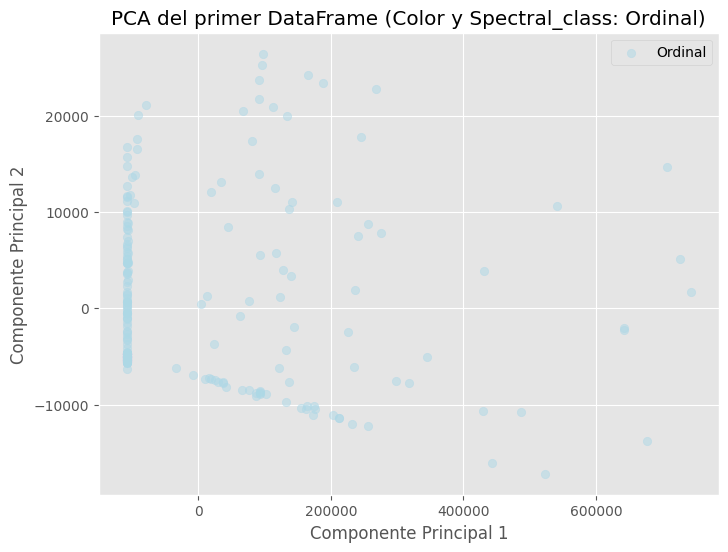

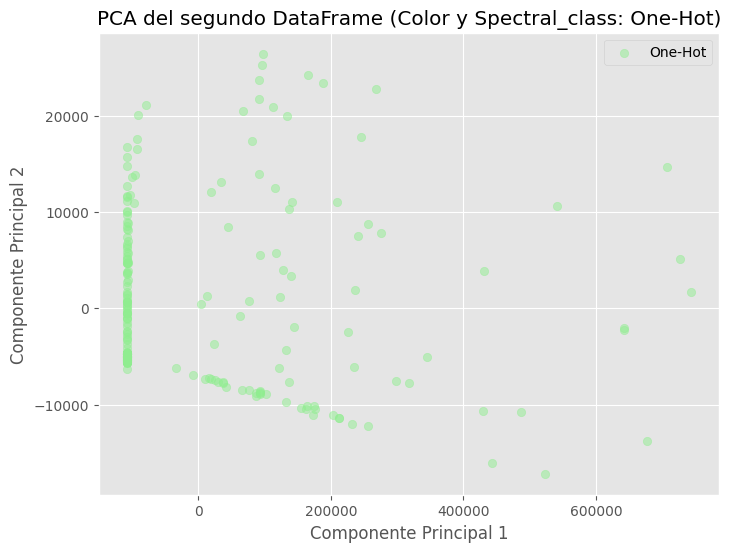

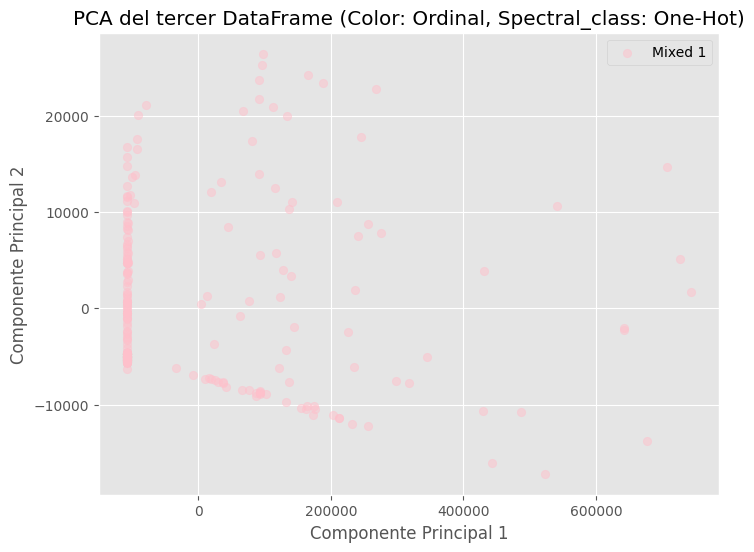

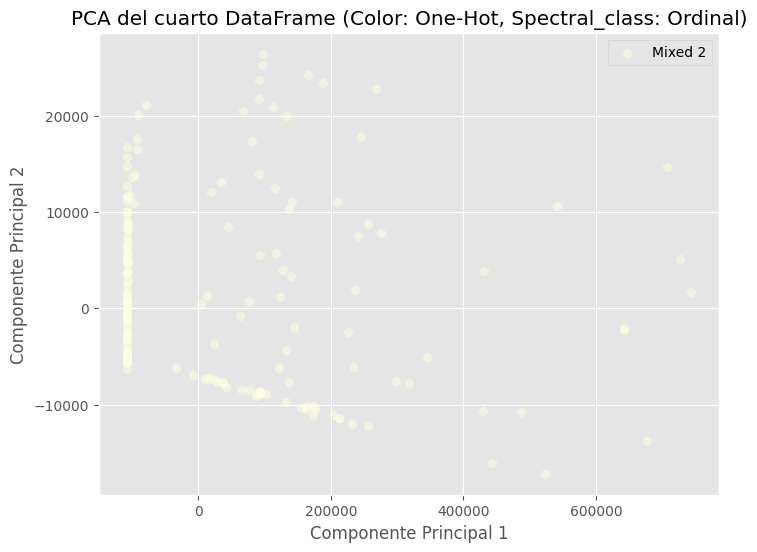

In [767]:
# Gráfico para el tercer DataFrame (color y Spectral_class en ordinalidad)
plt.figure(figsize=(8, 6))
plt.scatter(df_ordinal_pca_df["PCA_Component_1"], df_ordinal_pca_df["PCA_Component_2"], c='lightblue', alpha=0.5, label='Ordinal')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del primer DataFrame (Color y Spectral_class: Ordinal)")
plt.legend()
plt.show()

# Gráfico para el cuarto DataFrame (color y Spectral_class en One-Hot Encoding)
plt.figure(figsize=(8, 6))
plt.scatter(df_one_hot_pca_df["PCA_Component_1"], df_one_hot_pca_df["PCA_Component_2"], c='lightgreen', alpha=0.5, label='One-Hot')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del segundo DataFrame (Color y Spectral_class: One-Hot)")
plt.legend()

# Gráfico para el primer DataFrame (color en ordinalidad, Spectral_class en One-Hot Encoding)
plt.figure(figsize=(8, 6))
plt.scatter(df_3_pca_df["PCA_Component_1"], df_3_pca_df["PCA_Component_2"], c='pink', alpha=0.5, label='Mixed 1')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del tercer DataFrame (Color: Ordinal, Spectral_class: One-Hot)")
plt.legend()
plt.show()

# Gráfico para el segundo DataFrame (color en One-Hot Encoding, Spectral_class en ordinalidad)
plt.figure(figsize=(8, 6))
plt.scatter(df_4_pca_df["PCA_Component_1"], df_4_pca_df["PCA_Component_2"], c='lightyellow', alpha=0.5, label='Mixed 2')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del cuarto DataFrame (Color: One-Hot, Spectral_class: Ordinal)")
plt.legend()
plt.show()

Una posible razón por la que las gráficas se parecen tanto podría ser que los parámetros de "color" y "spectral class" no tienen un impacto significativo en la varianza, por lo que su codificación no hace mucha diferencia. Sin embargo, para tener más certeza, vamos a escalar los datos para ver si eso arroja un resultado más claro.

### 3.2 PCA con datos escalado STANDARD SCALER

In [768]:
# Usamos dos componentes principales
pca = PCA(n_components=2)

df_ordinal_pca = pca.fit_transform(df_ordinal_scaled)
df_one_hot_pca = pca.fit_transform(df_one_hot_scaled)
df_3_pca = pca.fit_transform(df_3_scaled)
df_4_pca = pca.fit_transform(df_4_scaled)


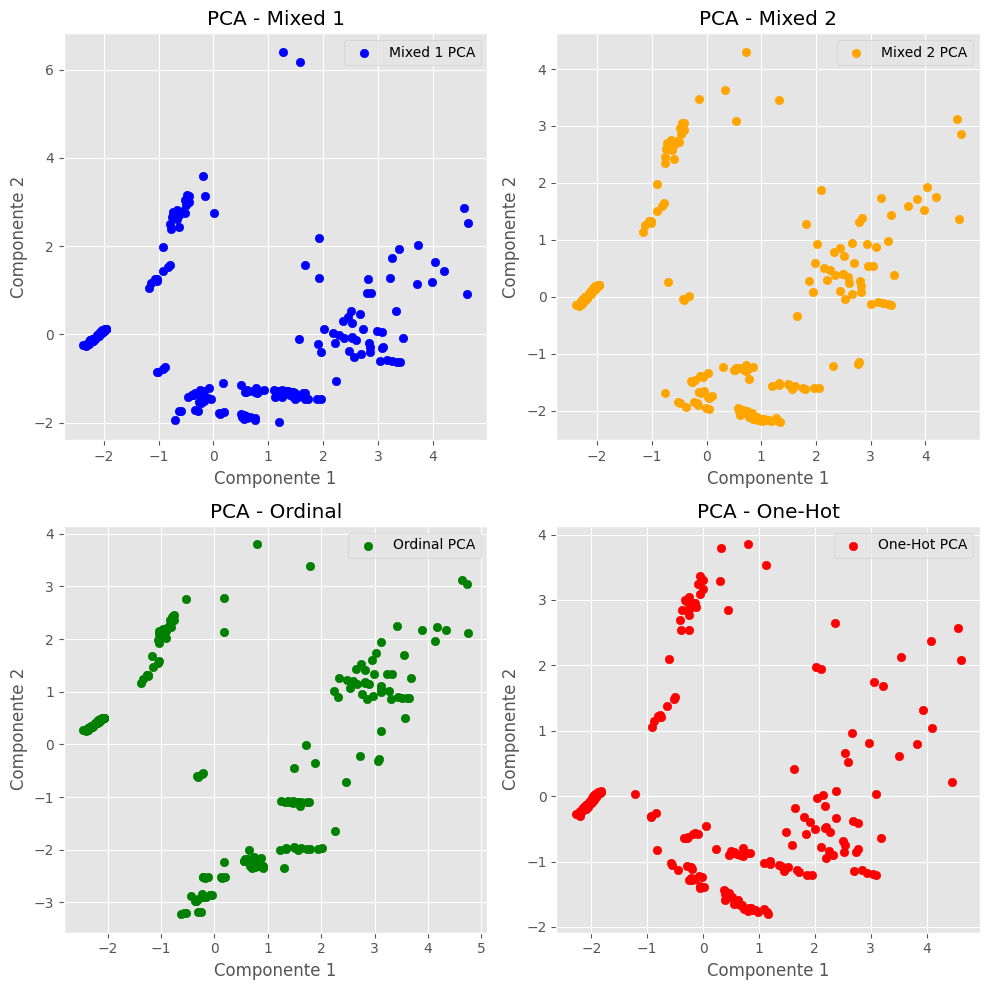

In [769]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # Crear un grid de 2x2

# Primer gráfico (arriba a la izquierda)
ax[1, 0].scatter(df_ordinal_pca[:, 0], df_ordinal_pca[:, 1], c='green', label='Ordinal PCA')
ax[1, 0].set_title('PCA - Ordinal')
ax[1, 0].set_xlabel('Componente 1')
ax[1, 0].set_ylabel('Componente 2')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Segundo gráfico (arriba a la derecha)
ax[1, 1].scatter(df_one_hot_pca[:, 0], df_one_hot_pca[:, 1], c='red', label='One-Hot PCA')
ax[1, 1].set_title('PCA - One-Hot')
ax[1, 1].set_xlabel('Componente 1')
ax[1, 1].set_ylabel('Componente 2')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Tercer gráfico (abajo a la izquierda)
ax[0, 0].scatter(df_3_pca[:, 0], df_3_pca[:, 1], c='blue', label='Mixed 1 PCA')
ax[0, 0].set_title('PCA - Mixed 1')
ax[0, 0].set_xlabel('Componente 1')
ax[0, 0].set_ylabel('Componente 2')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Cuarto gráfico (abajo a la derecha)
ax[0, 1].scatter(df_4_pca[:, 0], df_4_pca[:, 1], c='orange', label='Mixed 2 PCA')
ax[0, 1].set_title('PCA - Mixed 2')
ax[0, 1].set_xlabel('Componente 1')
ax[0, 1].set_ylabel('Componente 2')
ax[0, 1].legend()
ax[0, 1].grid(True)




plt.tight_layout()
plt.show()

### 3.2 PCA con datos escalado MIN-MAX SCALER

In [770]:
# Usamos dos componentes principales
pca = PCA(n_components=2)

df_ordinal_pca2 = pca.fit_transform(df_ordinal_scaled2)
df_one_hot_pca2 = pca.fit_transform(df_one_hot_scaled2)
df_3_pca2 = pca.fit_transform(df_3_scaled2)
df_4_pca2 = pca.fit_transform(df_4_scaled2)


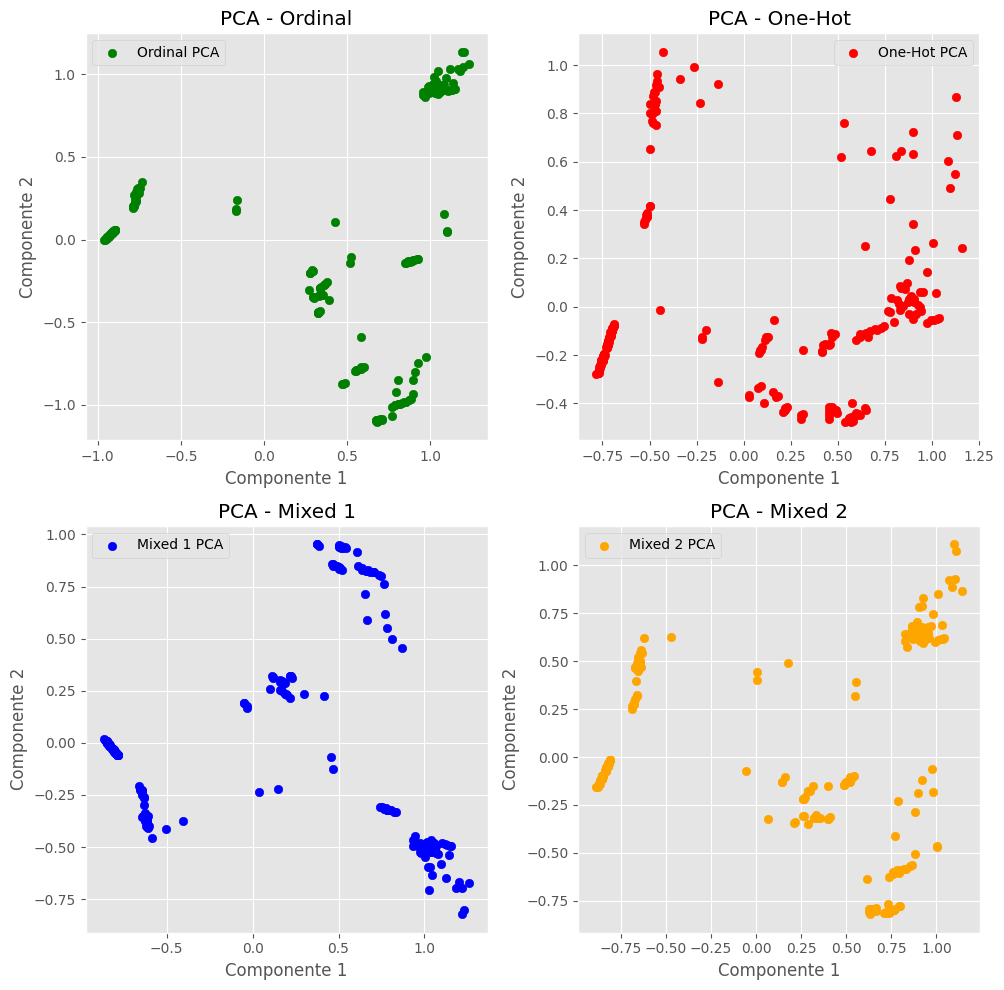

In [771]:
import matplotlib.pyplot as plt

# Crear un grid de 2x2
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Primer gráfico (arriba a la izquierda) - Ordinal
ax[0, 0].scatter(df_ordinal_pca2[:, 0], df_ordinal_pca2[:, 1], c='green', label='Ordinal PCA')
ax[0, 0].set_title('PCA - Ordinal')
ax[0, 0].set_xlabel('Componente 1')
ax[0, 0].set_ylabel('Componente 2')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Segundo gráfico (arriba a la derecha) - One-Hot
ax[0, 1].scatter(df_one_hot_pca2[:, 0], df_one_hot_pca2[:, 1], c='red', label='One-Hot PCA')
ax[0, 1].set_title('PCA - One-Hot')
ax[0, 1].set_xlabel('Componente 1')
ax[0, 1].set_ylabel('Componente 2')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Tercer gráfico (abajo a la izquierda) - Mixed 1
ax[1, 0].scatter(df_3_pca2[:, 0], df_3_pca2[:, 1], c='blue', label='Mixed 1 PCA')
ax[1, 0].set_title('PCA - Mixed 1')
ax[1, 0].set_xlabel('Componente 1')
ax[1, 0].set_ylabel('Componente 2')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Cuarto gráfico (abajo a la derecha) - Mixed 2
ax[1, 1].scatter(df_4_pca2[:, 0], df_4_pca2[:, 1], c='orange', label='Mixed 2 PCA')
ax[1, 1].set_title('PCA - Mixed 2')
ax[1, 1].set_xlabel('Componente 1')
ax[1, 1].set_ylabel('Componente 2')
ax[1, 1].legend()
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()


DECIDIMOS QUEDARNOS CON EL MIN-MAX SCALER

# **4. CLUSTERING**

Ahora le vamos a aplicar algoritmo de Jerárquico y K-MEANS pero antes debemos determinar cuantos clusters queremos aplicarle para eso aplicaremos el algortimo CLustering:

### 4.1 Aplicar Algortimo Clustering

Método Silhouette El método del codo (Elbow Method) no siempre proporciona un número óptimo de clústeres claro. Una alternativa es el método Silhouette, que utilizamos para nuestro análisis. Este enfoque se basa en dos distancias: la distancia media dentro del clúster (intra-cluster) y la distancia media con el clúster más cercano (inter-cluster). Valores altos indican una mejor separación entre clústeres y mayor cohesión interna.

Este código realiza una comparación de las puntuaciones de silueta entre dos algoritmos de clustering, KMeans y Clustering Jerárquico (Agglomerative Clustering), para diferentes números de clusters en una variedad de conjuntos de datos. Aquí tienes una definición general de lo que hace:

1. **Rango de número de clusters para probar:** Define un rango de números de clusters (desde 2 hasta 10) que se probarán para cada conjunto de datos.

2. **Funciones para calcular las puntuaciones de silueta:** Define dos funciones:
   - `my_silhouette_scores`: Calcula las puntuaciones de silueta para KMeans para cada número de clusters en el rango definido.
   - `my_silhouette_score_hierarchical`: Calcula las puntuaciones de silueta para Clustering Jerárquico para cada número de clusters en el rango definido.

3. **Aplicación de las funciones a los DataFrames:** Aplica estas funciones a una lista de DataFrames que contienen los datos transformados de diferentes tipos de conjuntos de datos.

4. **Visualización de las puntuaciones de silueta:** Crea una cuadrícula de subgráficos y, para cada subgráfico y su respectivo DataFrame:
   - Calcula las puntuaciones de silueta tanto para KMeans como para Clustering Jerárquico.
   - Grafica las puntuaciones de silueta en función del número de clusters para ambos métodos en el subgráfico correspondiente.

5. **Mostrar la visualización:** Muestra la cuadrícula de subgráficos que compara las puntuaciones de silueta de KMeans y Clustering Jerárquico para diferentes números de clusters en una variedad de conjuntos de datos.

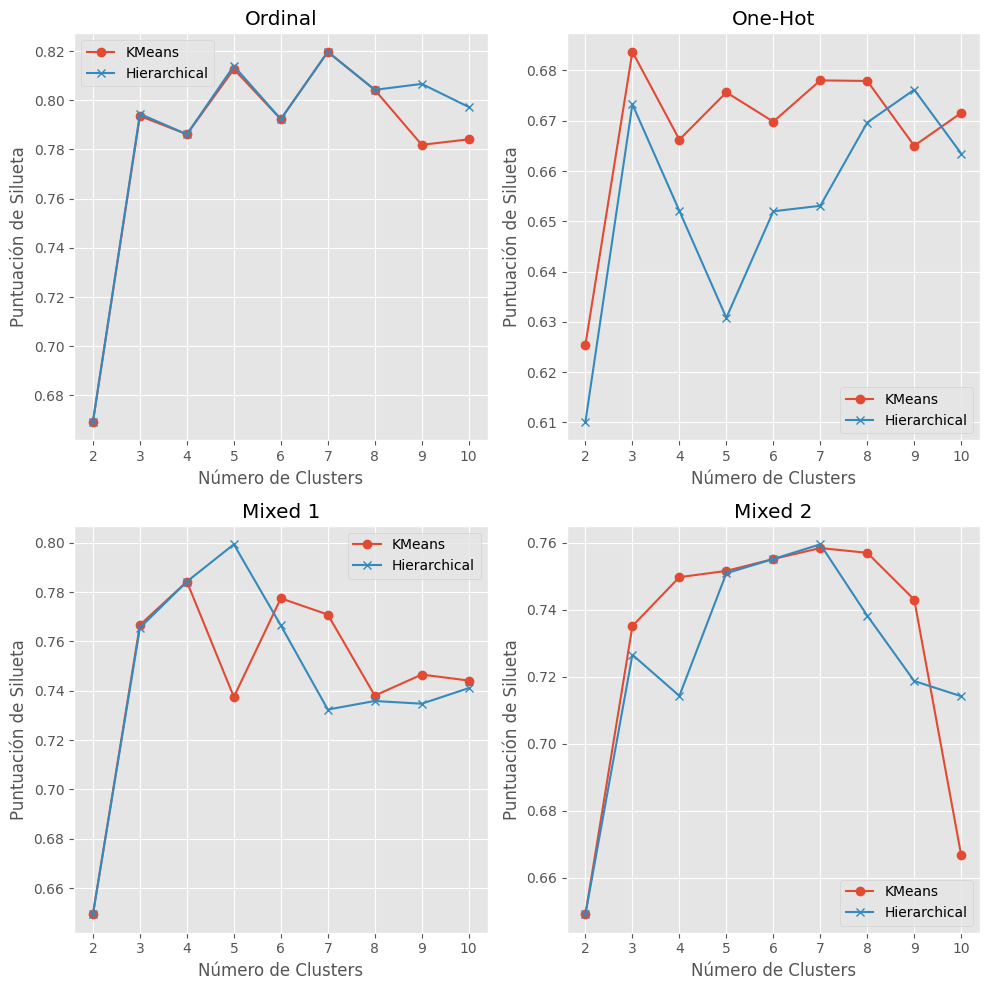

In [772]:
# Rango de número de clusters para probar
k_range = range(2, 11)

def my_silhouette_scores(df):
    silhouette_scores = []
    for k in k_range:
        kmeans = SKLearnKMeans(n_clusters=k, random_state=100472195)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

def my_silhouette_score_hierarchical(df):
    silhouette_scores = []
    for k in k_range:
        hierarchical = AgglomerativeClustering(n_clusters=k)
        cluster_labels = hierarchical.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores


# Aplicar la función a los DataFrames
dataframes = [ df_ordinal_pca2, df_one_hot_pca2, df_3_pca2, df_4_pca2]
titles = ["Ordinal", "One-Hot", "Mixed 1", "Mixed 2"]

# Crear un grid de 2x2 para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, df, title in zip(axes.flatten(), dataframes, titles):
    # Calcular las puntuaciones de silueta para KMeans y Clustering Jerárquico
    scores_kmeans = my_silhouette_scores(df)
    scores_hierarchical = my_silhouette_score_hierarchical(df)
    
    # Graficar las puntuaciones de silueta
    ax.plot(list(k_range), scores_kmeans, label='KMeans', marker='o')
    ax.plot(list(k_range), scores_hierarchical, label='Hierarchical', marker='x')
    
    # Títulos y etiquetas
    ax.set_title(title)
    ax.set_xlabel("Número de Clusters")
    ax.set_ylabel("Puntuación de Silueta")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


Los resultados indican que el número óptimo de clústeres es entre 7 y 8 para la mayoría de los casos. Usaremos 7 clusters entonces:

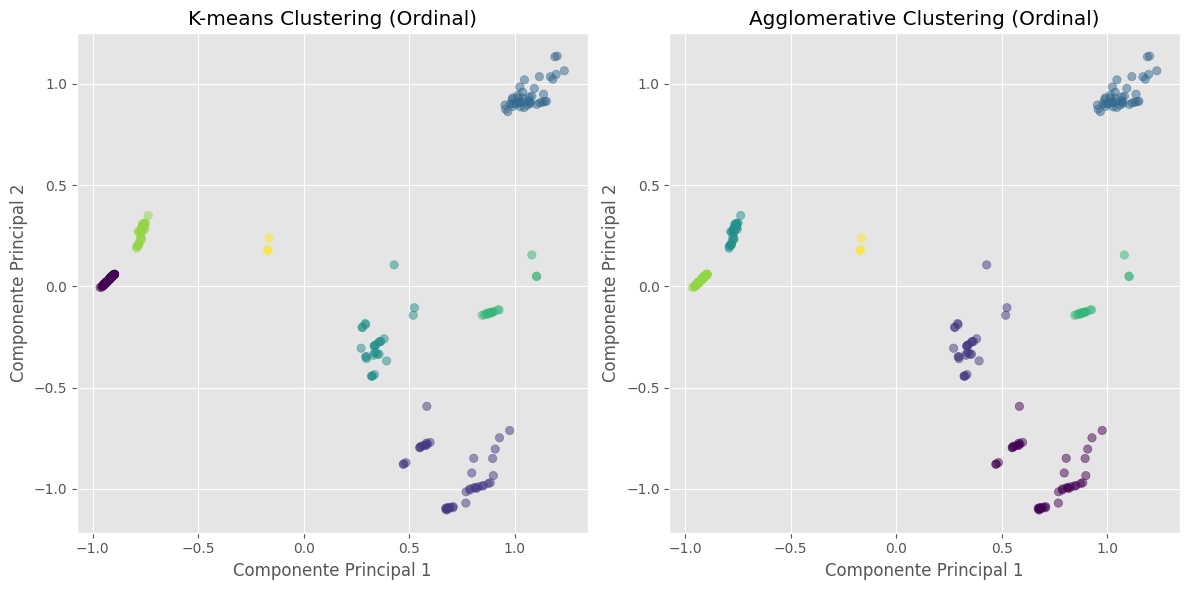

Silhouette Score para K-means (Ordinal): 0.820
Silhouette Score para Agglomerative Clustering (Ordinal): 0.820


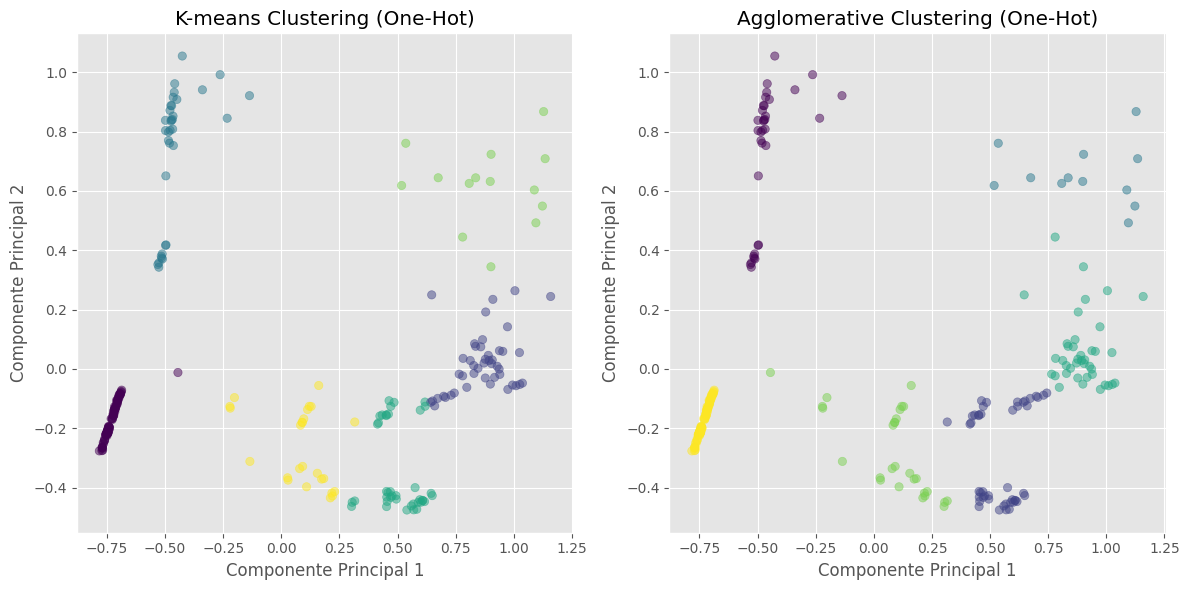

Silhouette Score para K-means (One-Hot): 0.670
Silhouette Score para Agglomerative Clustering (One-Hot): 0.652


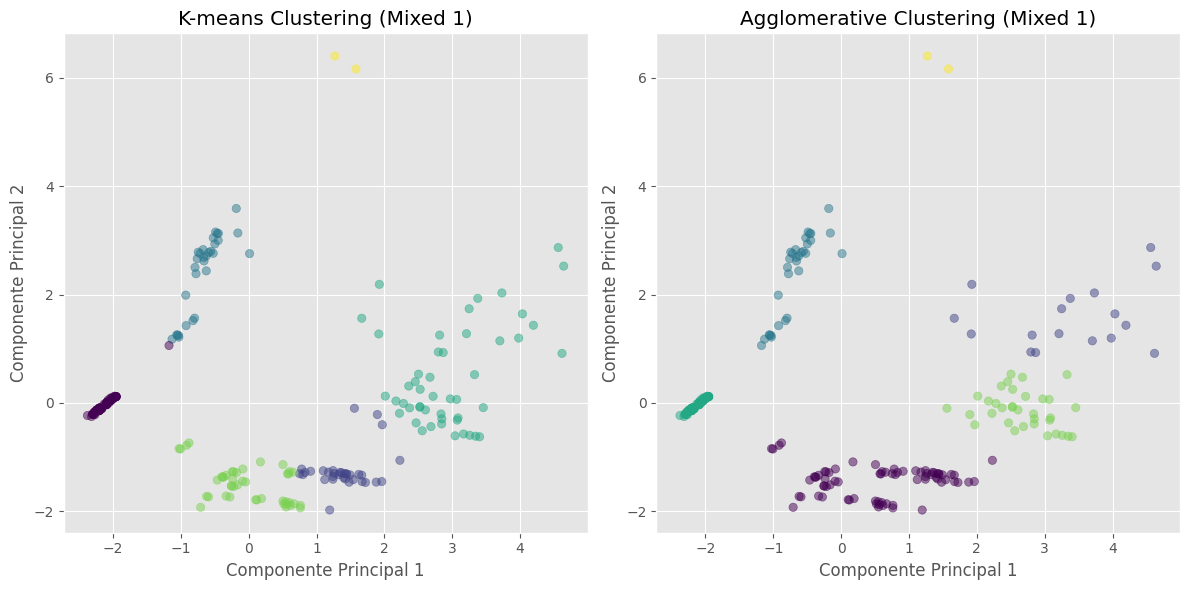

Silhouette Score para K-means (Mixed 1): 0.637
Silhouette Score para Agglomerative Clustering (Mixed 1): 0.666


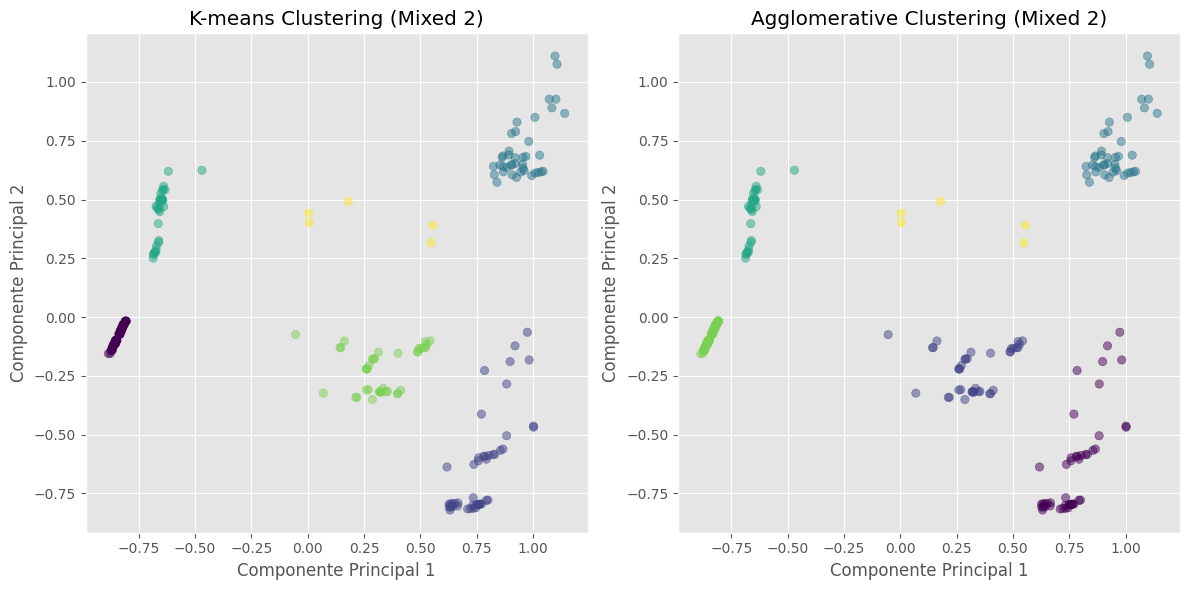

Silhouette Score para K-means (Mixed 2): 0.755
Silhouette Score para Agglomerative Clustering (Mixed 2): 0.755


In [773]:
# Número de clusters para cada tipo de conjunto de datos
num_clusters = {
    "Ordinal": 7,  # Número de clusters específico para el conjunto ordinal
    "default": 6  # Número de clusters para el resto
}

# Aplicar la función a los DataFrames
dataframes = [ df_ordinal_pca2, df_one_hot_pca2, df_3_pca, df_4_pca2]
titles = ["Ordinal", "One-Hot", "Mixed 1", "Mixed 2"]

# Ciclo para aplicar K-means y Agglomerative Clustering a cada DataFrame
for df, title in zip(dataframes, titles):
    # Determinar el número de clusters basándose en el título del conjunto de datos
    n_clusters = num_clusters.get(title, num_clusters['default'])

    
    kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=100472195)
    kmeans_labels = kmeans.fit_predict(df)
    
    
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(df)
    
    
    plt.figure(figsize=(12, 6))  # Crear una figura con dos subgráficos
    
    # Gráfico para K-means
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.scatter(df[:, 0], df[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"K-means Clustering ({title})")
    
    # Gráfico para Agglomerative Clustering
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.scatter(df[:, 0], df[:, 1], c=agglomerative_labels, cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"Agglomerative Clustering ({title})")

    plt.tight_layout()
    plt.show()

    # Calcular el Silhouette Score para cada método de clustering
    kmeans_silhouette = silhouette_score(df, kmeans_labels)
    agglomerative_silhouette = silhouette_score(df, agglomerative_labels)

    print(f"Silhouette Score para K-means ({title}): {kmeans_silhouette:.3f}")
    print(f"Silhouette Score para Agglomerative Clustering ({title}): {agglomerative_silhouette:.3f}")

Resultados para "Ordinal" K-means: Con 0.820, el clustering parece estar bien definido, con una buena separación entre los clusters. Agglomerative Clustering: Con un Silhouette Score de 0.820, es igual al de K-means. Estos resultados sugieren que la codificación ordinal puede mostrar resultados buenos para esta configuración.

Resultados para "One-Hot" K-means: Con un puntaje de 0.670. Agglomerative Clustering: Con un Silhouette Score de 0.652 para Agglomerative Clustering. Estos resultados también sugieren que la codificación One-Hot ofrece una mejor separación para K-means.

Resultados para "Mixed 1" K-means: El puntaje es de 0.637, sugiriendo que hay cierta superposición entre clusters, pero en general el agrupamiento es aceptable. Agglomerative Clustering: Con un puntaje de 0.666, Agglomerative Clustering parece funcionar de manera similar a K-means para esta combinación. En este caso, ambos algoritmos parecen proporcionar resultados comparables en términos de separación de clusters.

Resultados para "Mixed 2" K-means: Con un Silhouette Score de 0.755, el clustering parece estar bien definido, con una buena separación entre los clusters. Agglomerative Clustering: El puntaje es 0.755, igual al de K-means, pero aún indica una buena agrupación. En general, ambos algoritmos muestran un resultado sólido para esta configuración, con K-means apenas superando a Agglomerative Clustering.

Silhouette Score: Los resultados para cada configuración indican variabilidad en la calidad del clustering, pero en general, ambos algoritmos parecen generar agrupamientos válidos. Sin embargo, la superioridad de Agglomerative Clustering en algunas combinaciones podría indicar que este algoritmo es más adecuado para ciertos tipos de datos o estructuras de clustering.

## ANÁLISIS

### Elección del dataframe

Tras visualizar los datos, tras haber considerado el método del Silhouette Score, hemos decidido que el dataframe más adecuado para trabajar es el 'dt_ordinal_pca2'. Este dataframe ha pasado por varias transformaciones: 
1. Conversión del dataframe original ('df') a un formato ordinal ('df_ordinal').
2. Escalado ('df_ordinal_scaled2').
3. Aplicación de un PCA ('df_ordinal_pca2').
Finalmente se utilizó el algoritmo K-means para clustering con 7 clústeres y un estado aleatorio de 100472195.

Esta transformación incluyó convertir las variables categóricas "Color" y "Spectral Class" a valores ordinales, reflejando un orden de estrellas desde las más frías hasta las más calientes. Posteriormente, se escaló el dataframe y se aplicó un análisis de componentes principales (PCA). Finalmente, se usó K-means para el clustering, que resultó en un Silhouette Score adecuado.

Hemos elegido este dataframe debido a que su configuración ordinal coincide con el número de clústeres que se usa comúnmente, y porque convertir las variables categóricas a un formato ordinal es la mejor manera de mantener la información original. En las próximas secciones, entraremos en más detalles sobre las razones detrás de esta elección y explicaremos cómo se relaciona con los resultados obtenidos.

### **Coincidencias en los resultados**

In [774]:
import pandas as pd

# Crear el DataFrame
data = {
    "Clase": ["Enana roja", "Enana marrón", "Enana blanca", "Estrella en secuencia", "Super gigante", "Hiper gigante"],
    "Temperatura": [3000, 3300, 14000, 16000, 15000, 11000],
    "L": ["7.0∙10^-4", "5.5∙10^-3", "2.5∙10^-3", "3.2∙10^4", "3.0∙10^5", "3.0∙10^5"],
    "R": ["1.0∙10^-1", "3.5∙10^-1", "1.0∙10^-2", "4.4", "5.0∙10^1", "1.4∙10^3"],
    "A_M": ["+17.5", "+12.5", "+12.6", "-0.4", "-6.4", "-9.6"],
    "Color": ["rojo", "rojo", "blanca", "blancaamarilla", "blancaamarilla", "amarilla"],
    "Clase Espectral": ["K-M", "M", "B-G", "B-M", "B-M", "B-M"]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
df

,Clase,Temperatura,L,R,A_M,Color,Clase Espectral
0,Enana roja,3000,7.0∙10^-4,1.0∙10^-1,+17.5,rojo,K-M
1,Enana marrón,3300,5.5∙10^-3,3.5∙10^-1,+12.5,rojo,M
2,Enana blanca,14000,2.5∙10^-3,1.0∙10^-2,+12.6,blanca,B-G
3,Estrella en secuencia,16000,3.2∙10^4,4.4,-0.4,blancaamarilla,B-M
4,Super gigante,15000,3.0∙10^5,5.0∙10^1,-6.4,blancaamarilla,B-M
5,Hiper gigante,11000,3.0∙10^5,1.4∙10^3,-9.6,amarilla,B-M


In [775]:
# Paso 1: Aplicar KMeans con 7 clusters
n_clusters = 7
kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=100472195)
cluster_labels = kmeans.fit_predict(df_ordinal_pca2)

# Paso 2: Crear un diccionario para agrupar índices por cluster
cluster_indices = {i: [] for i in range(n_clusters)}

# Paso 3: Asignar los índices a cada cluster
for index, label in enumerate(cluster_labels):
    cluster_indices[label].append(index)

# Imprimir los índices por cluster
for cluster, indices in cluster_indices.items():
    print(f"Índices en el cluster {cluster}: {indices}")

Índices en el cluster 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índices en el cluster 1: [20, 24, 26, 31, 32, 33, 83, 84, 85, 86, 87, 94, 95, 98, 140, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 177, 178, 179, 210, 211, 212, 213, 216, 217, 218, 230, 233, 234]
Índices en el cluster 2: [30, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 176, 214, 215, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 235, 236, 239]
Índices en el cluster 3: [21, 22, 23, 25, 27, 28, 29, 34, 35, 36, 37, 38, 39, 80, 81, 82, 88, 90, 91, 92, 93, 96, 97, 147, 148, 172, 219, 237, 238]
Índices en el cluster 4: [49, 

In [776]:
# Añadir etiquetas de cluster al DataFrame original
df_2['Cluster'] = cluster_labels

# Agrupar por cluster y calcular el promedio de cada columna
df_avg_per_cluster = df_2.groupby('Cluster').mean()

# Mostrar el promedio para cada cluster en el DataFrame original
print("Promedio por cluster:")
print(df_avg_per_cluster)

Promedio por cluster:
          Temperature              L            R        A_M     Color  \
Cluster                                                                  
0         3140.887500       0.003050     0.229080  15.051737  0.000000   
1        16494.238095   67265.597080   181.445822   1.925214  6.976190   
2        22294.075000  330564.625000   257.794675  -6.596175  8.000000   
3         7819.896552   54222.981173   133.271700   6.791862  4.965517   
4        20979.000000   48500.001060   107.321895   8.151875  8.000000   
5         3551.466667  208933.333333   957.866667  -8.908667  0.000000   
6         4871.333333  353666.666667  1549.666667  -9.836667  0.666667   

         Spectral_Class  
Cluster                  
0              0.000000  
1              4.714286  
2              6.000000  
3              2.896552  
4              5.000000  
5              0.000000  
6              1.000000  


#### **Recordemos el orden**

| ID | Color Estelar   | Clasificación Espectral |
|----|-----------------|-------------------------|
| 0  | Red             | M                       |
| 1  | Orange-Red      | K                       |
| 2  | Orange          | G                       |
| 3  | Yellow-Orange   | F                       |
| 4  | Yellow          | A                       |
| 5  | White-Yellow    | B                       |
| 6  | White           | O                       |
| 7  | Blue-White      |                         |
| 8  | Blue            |                         |

## Análisis final

Vamos a realizar el análisis en base a las características promedio de cada cluster:

### Agrupación de Clusters:

1. **Cluster 0 y 5:** Características típicas de enanas rojas y enanas marron.
2. **Cluster 1:** Características típicas de estrella en secuencia.
2. **Cluster 2, 3 y 4:** Características atípicas, no coinciden directamente con las clases de estrellas en el DataFrame de referencia.
3. **Cluster 6:** Características distintivas, no coinciden directamente con las clases de estrellas en el DataFrame de referencia.

### Análisis Comparativo:

1. **Cluster 0 y 5 (Enanas rojas y Enanas Marrón):** Coinciden en temperatura baja, baja luminosidad, color rojo y clasificación espectral M, características típicas de enanas rojas y enanas marrón en el DataFrame de referencia.
2. **Cluster 1:** Coinciden en color White-Yellow aunque este un poco más proximo al White, y clasificación espectral B que se aproxima al 5
2. **Cluster 2, 3 y 4 (Atípicas):** Muestran una variedad de características que no se alinean directamente con las clases de estrellas en el DataFrame de referencia. Pueden representar estrellas con características inusuales o mezclas de diferentes clases.
3. **Cluster 6 (Distinctive):** Exhibe características que no coinciden directamente con ninguna clase de estrella en el DataFrame de referencia. Podría representar estrellas con propiedades únicas o poco comunes.

### Conclusión:

Aunque podemos identificar similitudes entre los clusters y las clases de estrellas en el DataFrame de referencia para los clusters de enanas rojas, otros clusters no tienen una correspondencia directa. Esto sugiere que la agrupación realizada por el algoritmo de clustering está capturando características que no están completamente representadas en las clases de estrellas definidas en el DataFrame de referencia. Esto puede ser debido a la complejidad de las propiedades estelares y la limitación de las categorías definidas en el DataFrame de referencia. Es importante tener en cuenta estas diferencias al interpretar los resultados del análisis de clustering y considerar más investigaciones para comprender completamente las características de cada grupo de estrellas identificado por el algoritmo de clustering.